In [21]:
%matplotlib inline

In [1]:
import networkx as nx
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.colors as col
import warnings
import sys
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


G = nx.read_edgelist("./gene-network.tsv")
pos = nx.spring_layout(G)

disease_dic = {}
disease_file  = open("gene-disease0.TSV", 'r')

In [2]:
for line in disease_file:
    li = line.strip()
    if not li.startswith("#"):
        li2 = li.split(' ',1)
        disease_key = li2[0]
        print ("the key is: "+disease_key)
        disease_list = [l for l in (li2[1]).split('/')]
        print (disease_list)
        disease_dic.update({disease_key: disease_list})

the key is: adrenalglanddiseases
['3758', '215', '3762', '1589', '1585', '6770', '2516', '6557', '5573', '2778', '7809', '1584', '1586', '51', '1187', '190', '3284', '7157']
the key is: alzheimerdisease
['5663', '23036', '348', '5664', '55103', '10452', '1191', '2629', '2041', '10913', '51435', '4536', '4535', '351', '7305', '4973', '5819', '344558', '1378', '9627', '8301', '23607', '945', '5071', '341', '274', '25902', '9846', '54209']
the key is: aminoacidmetabolisminbornerrors
['445', '383', '2109', '3815', '11234', '388552', '4286', '275', '2110', '6898', '7299', '435', '7306', '5096', '37', '36', '875', '5009', '3257', '84343', '34', '89781', '28976', '10157', '84062', '8546', '26258', '2731', '1585', '2653', '593', '2108', '686', '5053', '1738', '35', '5092', '10165', '2184', '5095', '3141', '5860', '4935', '79803', '594', '1373', '5184', '3242', '3081', '1629', '2639', '27034']
the key is: amyotrophiclateralsclerosis
['6647', '1639', '6311', '57679', '10133', '2521', '998', '229

<IPython.core.display.Javascript object>


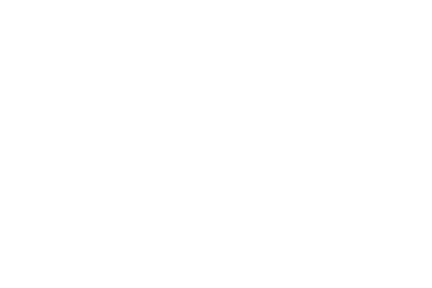

node not in pos


<IPython.core.display.Javascript object>


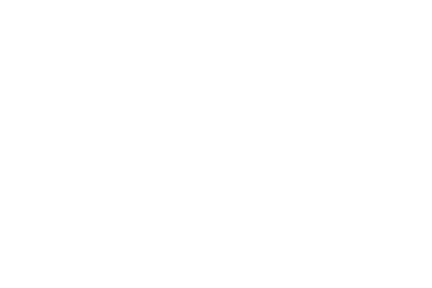

In [18]:
all_rest_nodes = list(G) # at the end should be
for key in disease_dic.keys():
    temp = [list(map(int, x)) for x in disease_dic[key]]
    all_rest_nodes = [x for x in all_rest_nodes if x not in temp]

nx.draw_networkx_nodes(G,pos,
                        nodelist= all_rest_nodes,
                        node_size=5,
                        node_color='gray',
                        alpha=0.8)
nx.draw_networkx_edges(G,pos,
                       edgelist=list(G.edges()),
                       width=8,alpha=0.5,edge_color='gray')
for key in disease_dic.keys():
    try:
        nx.draw_networkx_nodes(G,pos,
                            nodelist=disease_dic[key],
                            node_size=5,
                            node_color='red')
    except:
        print ("node not in pos")
plt.axis('off')
plt.savefig("gene-visualization-single-color.png")
plt.show()

node not in pos


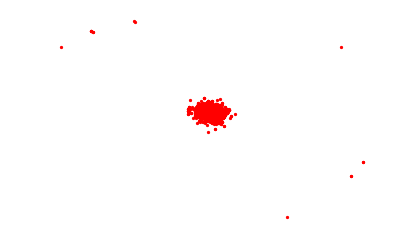

In [15]:
for key in disease_dic.keys():
    try:
        nx.draw_networkx_nodes(G,pos,
                            nodelist=disease_dic[key],
                            node_size=5,
                            node_color='red')
    except:
        print ("node not in pos")
plt.axis('off')
plt.savefig("gene-visualization-single-color.png")
plt.show()

In [19]:
import random
def colors(n):
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = float((int(r) % 256)/256)
        g = float((int(g) % 256)/256)
        b = float((int(b) % 256)/256)
        ret.append((r,g,b))
    return ret

TypeError: 'list' object is not callable

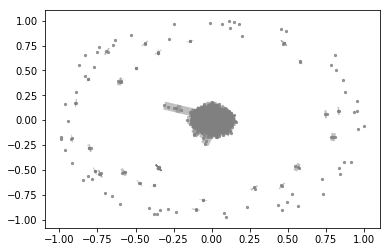

In [22]:
all_rest_nodes = list(G) # at the end should be
for key in disease_dic.keys():
    temp = [list(map(int, x)) for x in disease_dic[key]]
    all_rest_nodes = [x for x in all_rest_nodes if x not in temp]

nx.draw_networkx_nodes(G,pos,
                        nodelist= all_rest_nodes,
                        node_size=5,
                        node_color='gray',
                        alpha=0.8)
nx.draw_networkx_edges(G,pos,
                       edgelist=list(G.edges()),
                       width=8,alpha=0.5,edge_color='gray')

colors = colors(70)
for key in disease_dic.keys():
    try:
        nx.draw_networkx_nodes(G,pos,
                            nodelist=disease_dic[key],
                            node_size=5,
                            node_color=colors)
    except:
        print ("node not in pos")
plt.axis('off')
plt.savefig("gene-visualization-multiple-color.png")
plt.show()